In [4]:
!pip install streamlit

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train=pd.read_csv("Titanic_train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test=pd.read_csv("Titanic_test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

Data Cleaning


In [10]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [14]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


Handling the null values

In [15]:
cat_columns_train=train.drop(["PassengerId","Name","Sex","Ticket","Cabin","Embarked"],axis=1)
cat_columns_train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [16]:
cat_columns_test=train.drop(["PassengerId","Name","Sex","Ticket","Cabin","Embarked"],axis=1)
cat_columns_test

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [17]:
cat_columns_train["Age"].fillna(cat_columns_train["Age"].mean(), inplace=True)
cat_columns_test["Age"].fillna(cat_columns_test["Age"].mean(),inplace=True)

/tmp/ipython-input-2010980270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_columns_train["Age"].fillna(cat_columns_train["Age"].mean(), inplace=True)
/tmp/ipython-input-2010980270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [18]:
cat_columns_train['Age'] = cat_columns_train['Age'].astype('int64')

In [19]:
cat_columns_test['Age'] = cat_columns_test['Age'].astype('int64')

In [20]:
# train.isnull().sum()

In [21]:
# test.isnull().sum()

In [22]:
cat_columns_train['Fare'].fillna(cat_columns_train['Fare'].mean(), inplace=True)

/tmp/ipython-input-2751047035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_columns_train['Fare'].fillna(cat_columns_train['Fare'].mean(), inplace=True)


In [23]:
cat_columns_test['Fare'].fillna(cat_columns_test['Fare'].mean(), inplace=True)

/tmp/ipython-input-1173093924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_columns_test['Fare'].fillna(cat_columns_test['Fare'].mean(), inplace=True)


In [24]:
cat_columns_train.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


In [25]:
cat_columns_test.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


In [26]:
z=cat_columns_train.corr(numeric_only=True)
z

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


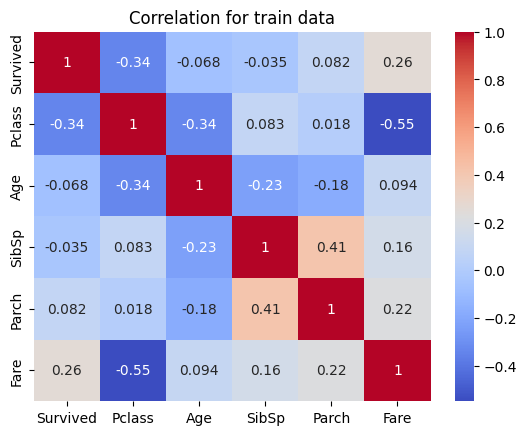

In [27]:
sns.heatmap(z, annot=True,cmap="coolwarm")
plt.title("Correlation for train data")
plt.show()

In [28]:
xyz=cat_columns_test.corr(numeric_only=True)
xyz

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


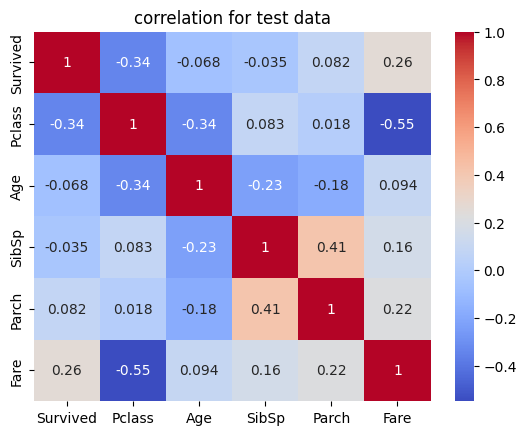

In [29]:
sns.heatmap(xyz, annot=True,cmap="coolwarm")
plt.title("correlation for test data")
plt.show()

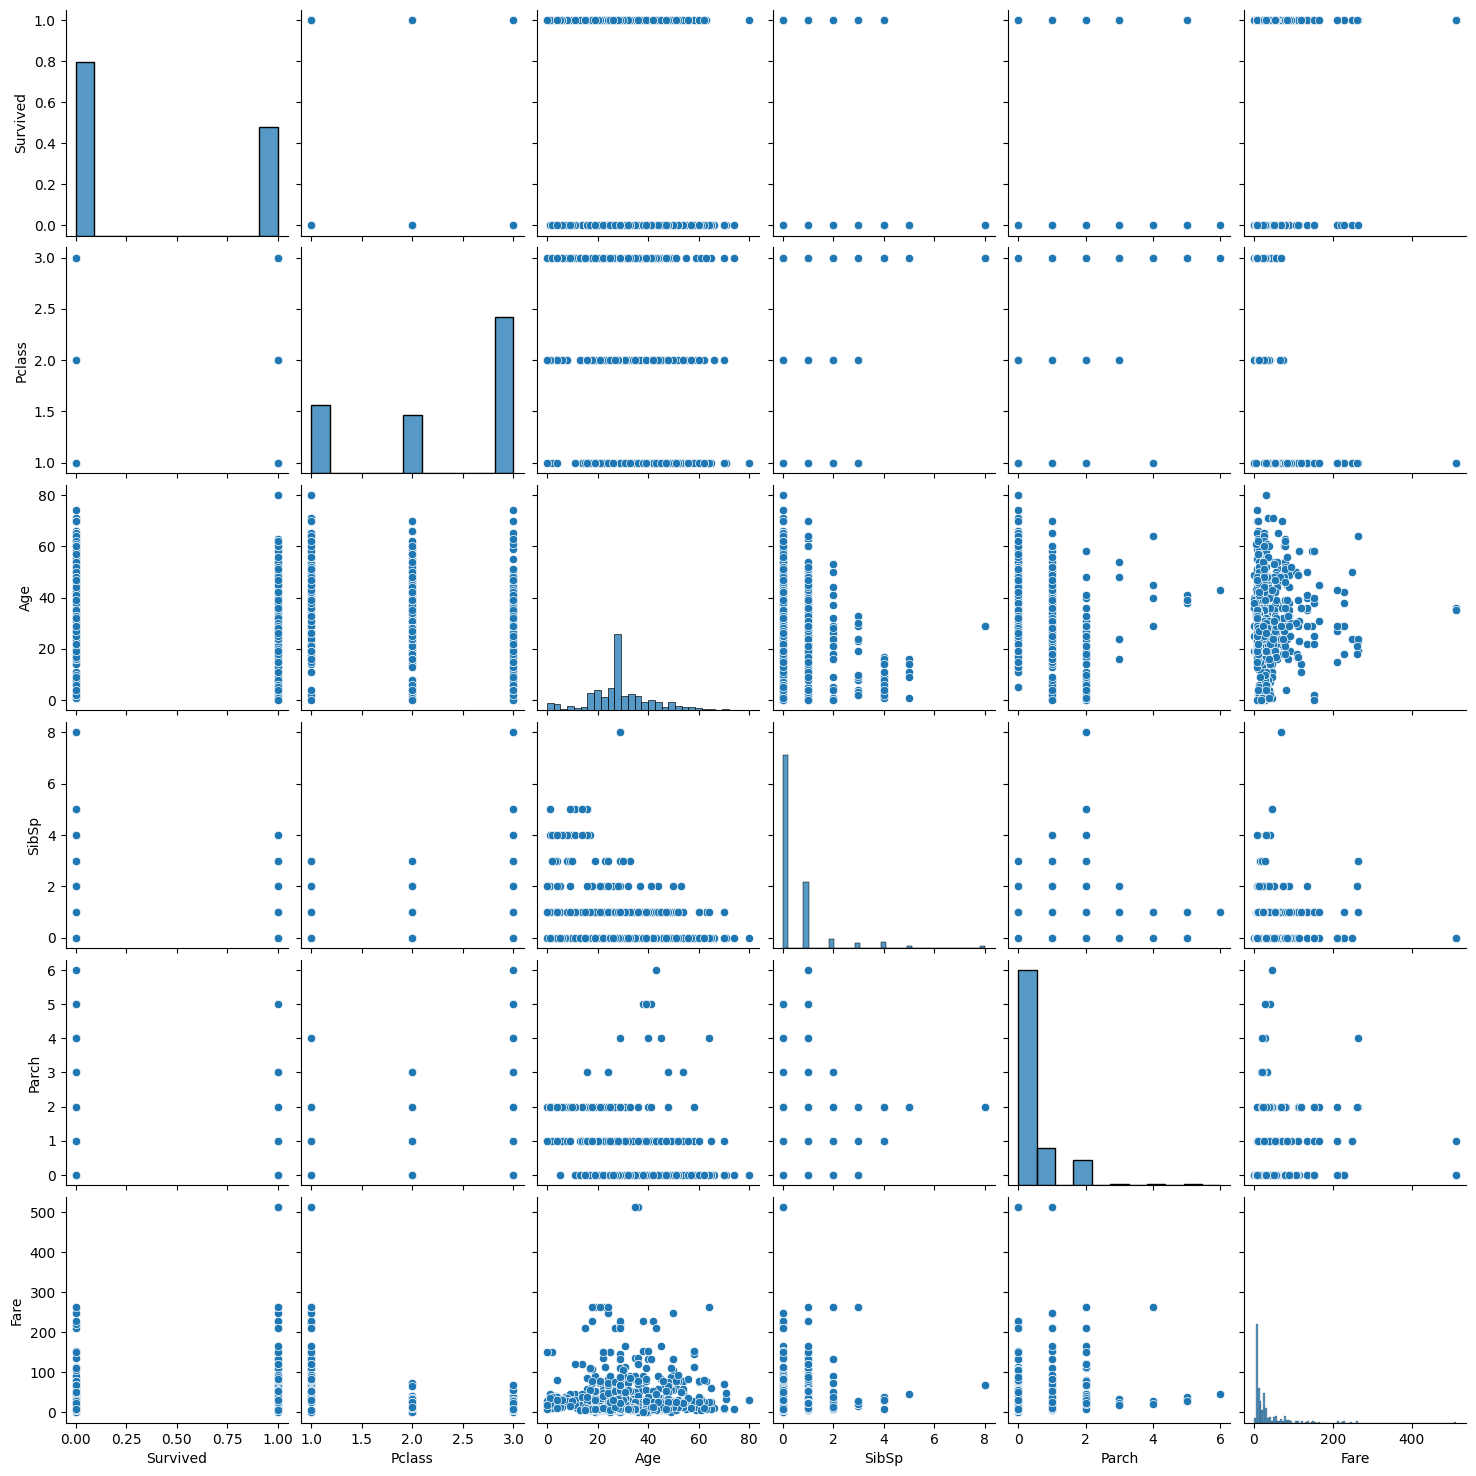

In [30]:
sns.pairplot(cat_columns_train)

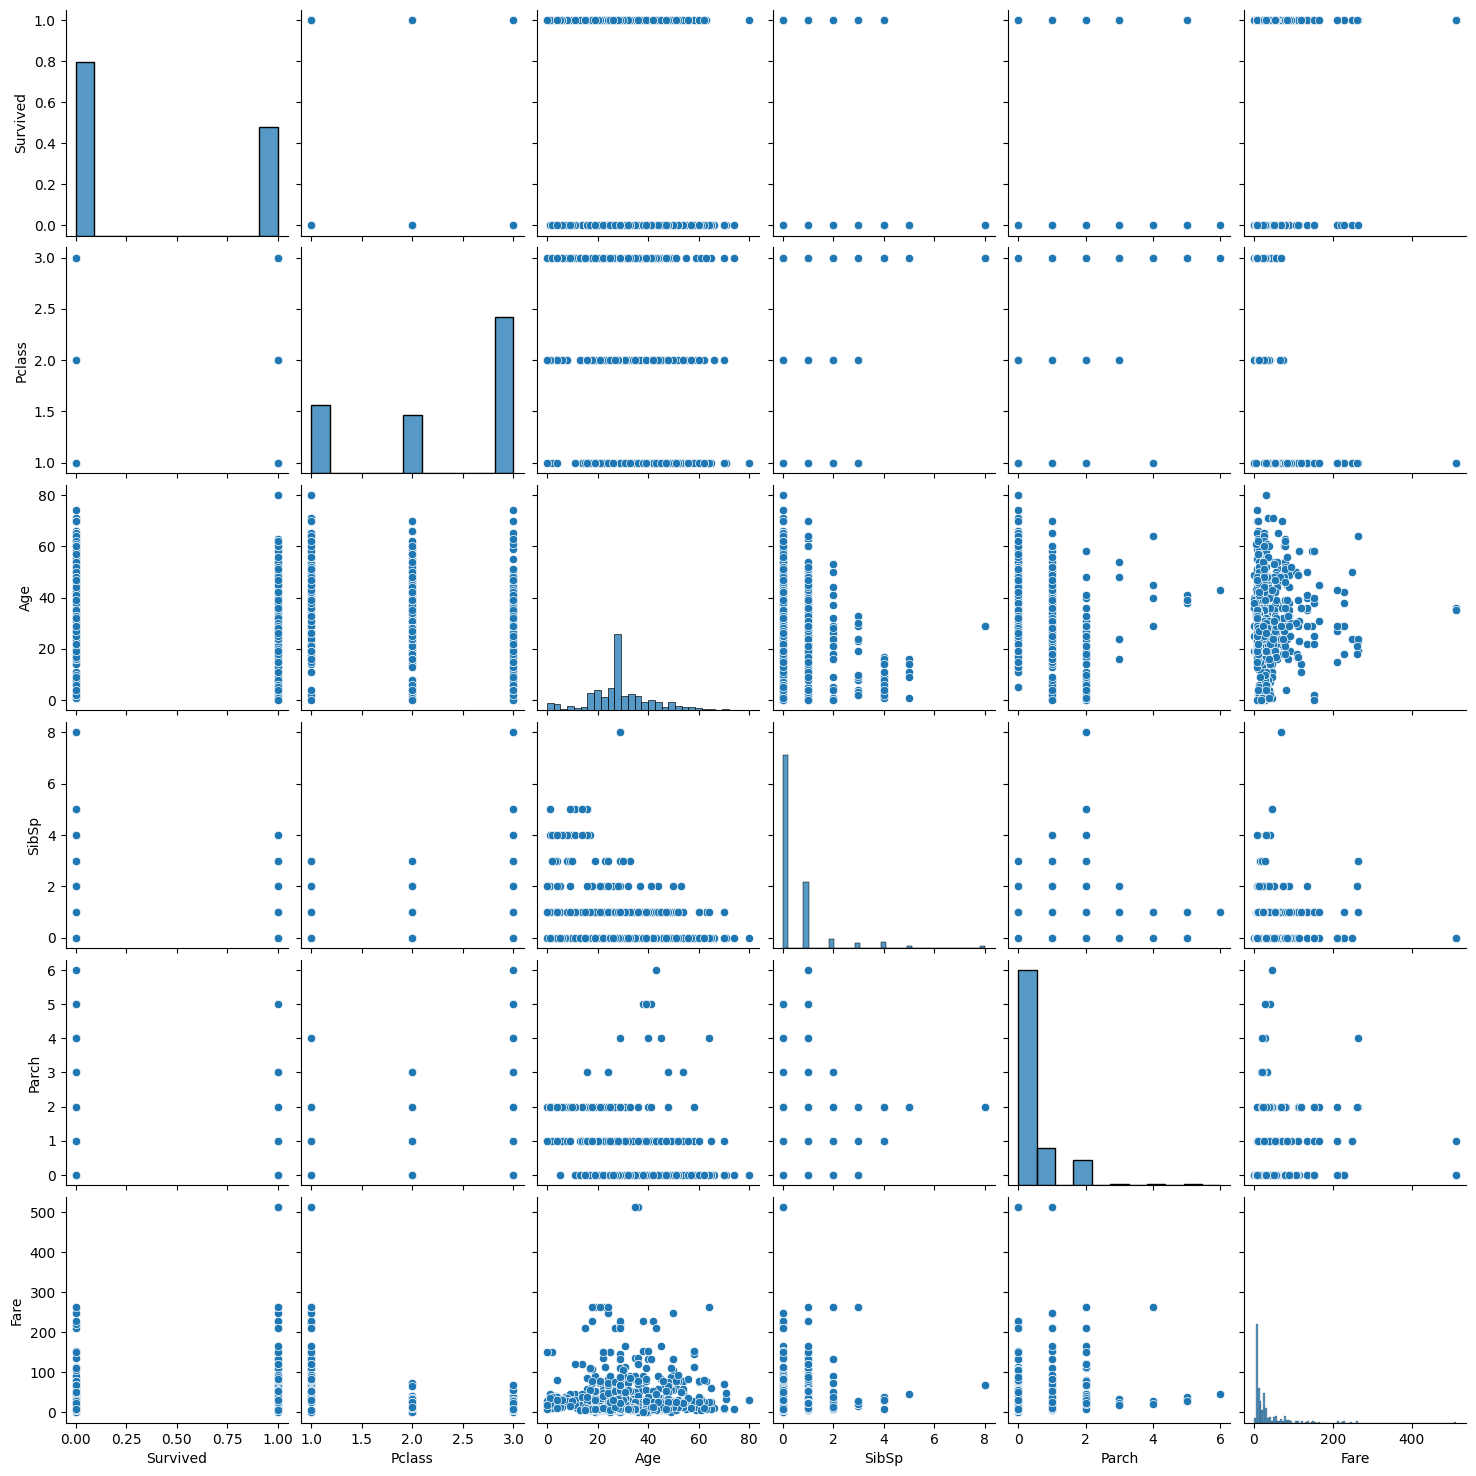

In [31]:
sns.pairplot(cat_columns_test)

In [32]:
df=pd.concat([cat_columns_train,cat_columns_test],sort=True).reset_index(drop=True)
df

,Age,Fare,Parch,Pclass,SibSp,Survived
0,22,7.2500,0,3,1,0
1,38,71.2833,0,1,1,1
2,26,7.9250,0,3,0,1
3,35,53.1000,0,1,1,1
4,35,8.0500,0,3,0,0
...,...,...,...,...,...,...
1777,27,13.0000,0,2,0,0
1778,19,30.0000,0,1,0,1
1779,29,23.4500,2,3,1,0
1780,26,30.0000,0,1,0,1


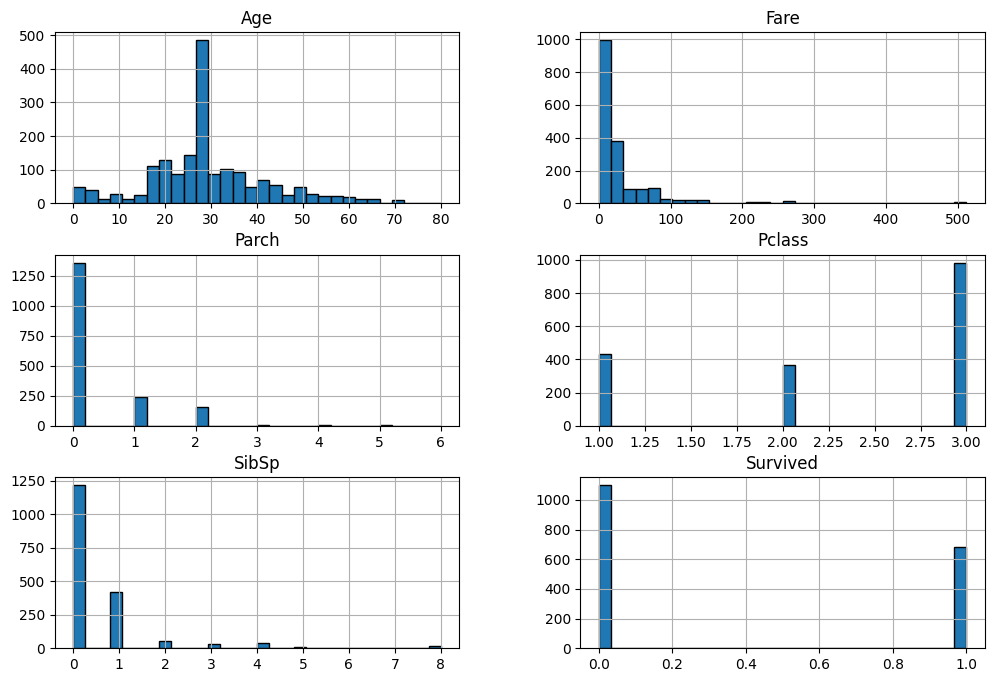

In [33]:
df.hist(bins=30, figsize=(12,8),edgecolor="black")
plt.show()

In [34]:
df = df.dropna(subset=['Survived'])

In [35]:
df

,Age,Fare,Parch,Pclass,SibSp,Survived
0,22,7.2500,0,3,1,0
1,38,71.2833,0,1,1,1
2,26,7.9250,0,3,0,1
3,35,53.1000,0,1,1,1
4,35,8.0500,0,3,0,0
...,...,...,...,...,...,...
1777,27,13.0000,0,2,0,0
1778,19,30.0000,0,1,0,1
1779,29,23.4500,2,3,1,0
1780,26,30.0000,0,1,0,1


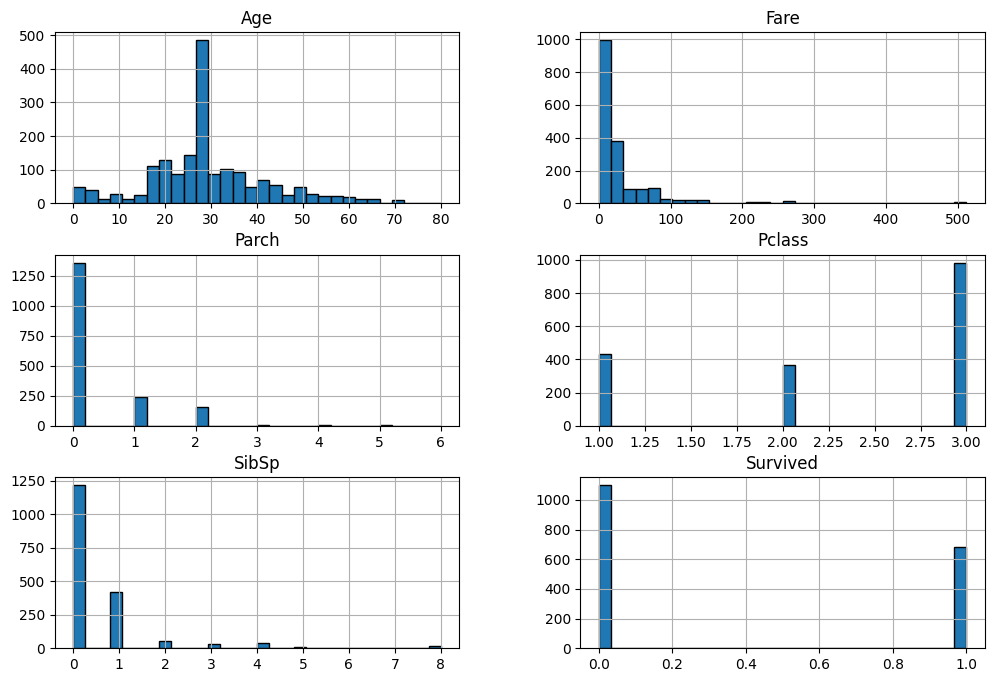

In [36]:
df.hist(bins=30,figsize=(12,8),edgecolor="Black")
plt.show()

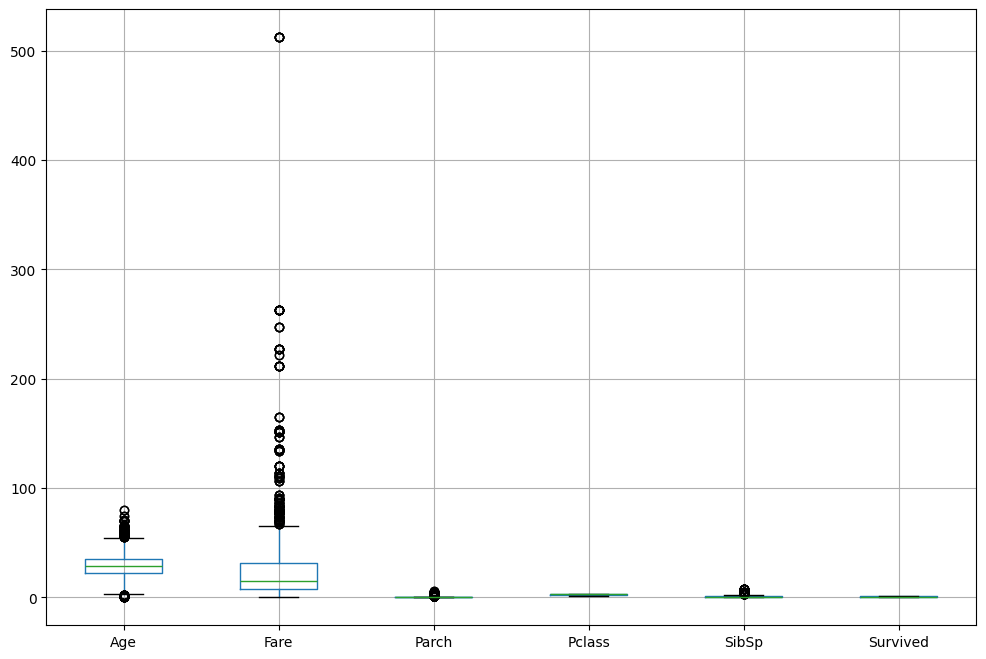

In [37]:
df.boxplot(figsize=(12,8))
plt.show()

In [38]:
df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived'], dtype='object')

Treating Outliers

In [39]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Age'] >= (Q1 - 1.5 * IQR)) & (df['Age'] <= (Q3 + 1.5 * IQR))]

In [40]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))]

In [41]:
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Parch'] >= (Q1 - 1.5 * IQR)) & (df['Parch'] <= (Q3 + 1.5 * IQR))]

In [42]:
Q1 = df['Pclass'].quantile(0.25)
Q3 = df['Pclass'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Pclass'] >= (Q1 - 1.5 * IQR)) & (df['Pclass'] <= (Q3 + 1.5 * IQR))]

In [43]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['SibSp'] >= (Q1 - 1.5 * IQR)) & (df['SibSp'] <= (Q3 + 1.5 * IQR))]

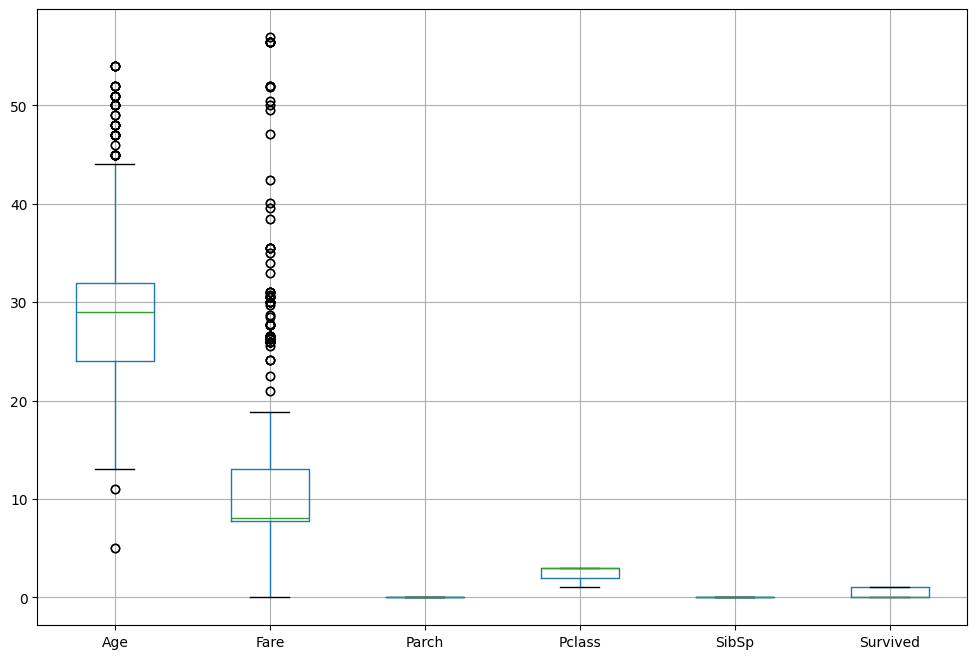

In [44]:
df.boxplot(figsize=(12,8))
plt.show()

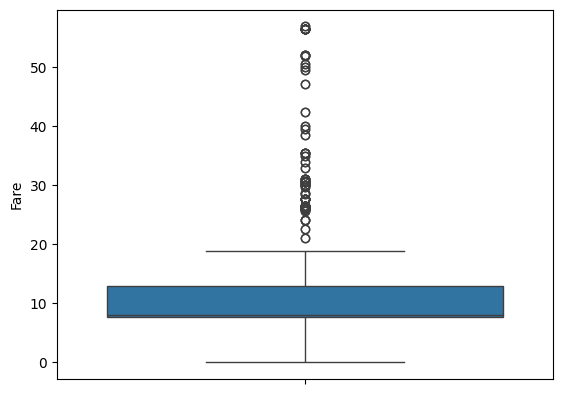

In [45]:
sns.boxplot(df["Fare"])
plt.show()

In [46]:
x = cat_columns_train.drop("Survived", axis=1)
y = cat_columns_test["Survived"]

In [47]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x=model.fit_transform(x)
x

array([[ 0.82737724, -0.58004441,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.65011226,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.27250525, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.04185087,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.27250525, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.18880351, -0.4745452 , -0.47367361, -0.49237783]])

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x,y)

LogisticRegression()

In [50]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0])

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [52]:
ac=accuracy_score(y_test, y_pred)
ac

0.7430167597765364

In [53]:
print(confusion_matrix(y_test, y_pred))

[[94 11]
 [35 39]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



In [55]:
print(roc_auc_score(y_test,y_pred))

0.7111325611325611


In [56]:
print(roc_curve(y_test,y_pred))

(array([0.       , 0.1047619, 1.       ]), array([0.        , 0.52702703, 1.        ]), array([inf,  1.,  0.]))


/tmp/ipython-input-2884565636.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


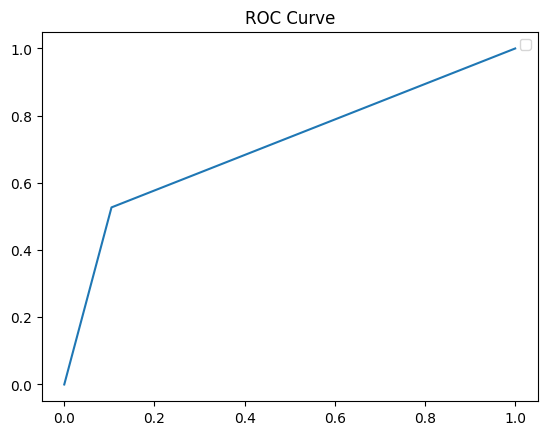

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.legend()
plt.show()

In [58]:
y_pred1=LR.predict(x_train)
y_pred1

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [59]:
print(accuracy_score(y_train,y_pred1))

0.6966292134831461


In [60]:
print(confusion_matrix(y_train, y_pred1))

[[380  64]
 [152 116]]


In [61]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       444
           1       0.64      0.43      0.52       268

    accuracy                           0.70       712
   macro avg       0.68      0.64      0.65       712
weighted avg       0.69      0.70      0.68       712



In [62]:
print(roc_auc_score(y_train,y_pred1))

0.6443458383756892


In [63]:
print(roc_curve(y_test,y_pred))

(array([0.       , 0.1047619, 1.       ]), array([0.        , 0.52702703, 1.        ]), array([inf,  1.,  0.]))


/tmp/ipython-input-487808155.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


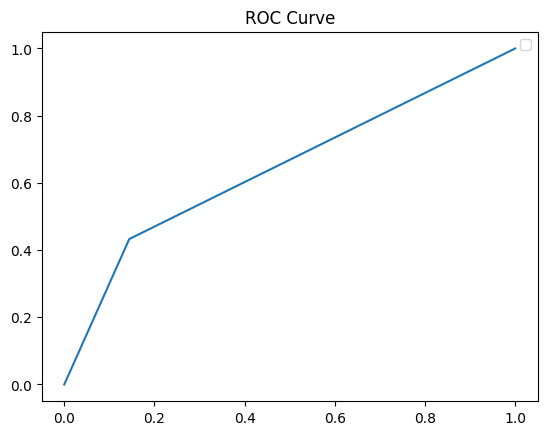

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred1)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.legend()
plt.show()

In [65]:
coefficients = LR.coef_[0]
coefficients

array([-0.77418995, -0.49078916, -0.26001628,  0.17540852,  0.23135093])

DEPLOYMENT PART

In [66]:
import getpass

In [67]:
nagrok_key = getpass.getpass("Enter ngrok key")
# Add Your AuthToken to Run the Streamlit Model


Enter ngrok key··········


In [68]:
!pip install streamlit pyngrok

In [69]:
import pickle
pickle.dump(LR, open("LR.pkl", "wb"))

print("✅ Model saved as LR.pkl")

✅ Model saved as LR.pkl


In [81]:
import streamlit as st
import pickle
import numpy as np

# Load model
model = pickle.load(open("LR.pkl", "rb"))

st.set_page_config(
    page_title="Titanic Survival Prediction",
    page_icon="🚢"
)

st.title("🚢 Titanic Survival Prediction")
st.write("Enter passenger details to predict survival.")

st.markdown("---")
st.header("🧍 Passenger Information")

# ---- CATEGORICAL INPUTS ----
sex = st.radio("Gender", ["Male", "Female"])
pclass = st.radio("Passenger Class (Pclass)", [1, 2, 3])

# Encode categorical values
sex_encoded = 1 if sex == "Male" else 0

# ---- NUMERIC INPUTS ----
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Siblings / Spouses aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Parents / Children aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Ticket Fare", min_value=0.0, value=32.0)

# Input array (ORDER MUST MATCH TRAINING)
input_data = np.array([[pclass, sex_encoded, age, sibsp, parch, fare]])

st.markdown("---")

if st.button("🔮 Predict Survival"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    st.subheader("📊 Prediction Result")

    if prediction == 1:
        st.success(
            f"✅ Passenger **SURVIVED**\n\n"
            f"📈 Survival Probability: **{probability:.2%}"
        )
    else:
        st.error(
            f"❌ Passenger **DID NOT SURVIVE**\n\n"
            f"📉 Survival Probability: **{probability:.2%}"
        )


2026-02-13 17:23:48.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 17:23:48.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [82]:
ls

app.py  logs.txt  LR.pkl  sample_data/  Titanic_test.csv  Titanic_train.csv


In [83]:
from pyngrok import ngrok

port = 8501
ngrok.set_auth_token(nagrok_key)
ngrok.connect(port).public_url

# click on url or copy open to view model

'https://heptahedral-synchronically-trang.ngrok-free.dev'

In [ ]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt

Survival criteria (besides Age)

1. Gender (Sex)
* Female → much higher survival chance
* Male → lower survival chance

2. Passenger Class (Pclass)
* 1st Class → highest survival
* 2nd Class → medium
* 3rd Class → lowest survival

3. Ticket Fare
* Higher fare → higher survival probability
* Very low fare → lower survival

4. Siblings / Spouses aboard (SibSp)
* 0–1 → better survival
* Many family members → lower survival

5. Parents / Children aboard (Parch)
* Small family → good
* Large family → bad


Interview Questions:

1. What is the difference between precision and recall?

Ans:
   
   - Precision and Recall are Performance for positive class detection
   

2. What is cross-validation, and why is it important in binary      classification?

Ans:

   - Cross-validation is a resampling technique used to evaluate the performance of a machine learning model.
   - It prevents the overfiting